In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data_path = '../data/'

In [3]:
df = pd.read_csv(f'{data_path}RELIANCE.csv')

In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3694,2024-03-21,2905.050049,2915.800049,2889.350098,2901.949951,2901.949951,6503468
3695,2024-03-22,2899.949951,2920.000000,2894.699951,2910.050049,2910.050049,9763804
3696,2024-03-26,2890.000000,2904.800049,2878.000000,2883.149902,2883.149902,5707953
3697,2024-03-27,2896.000000,3000.000000,2894.000000,2985.699951,2985.699951,8163322
3698,2024-03-28,2985.750000,3011.899902,2957.300049,2971.699951,2971.699951,10927182


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3699 non-null   object 
 1   Open       3699 non-null   float64
 2   High       3699 non-null   float64
 3   Low        3699 non-null   float64
 4   Close      3699 non-null   float64
 5   Adj Close  3699 non-null   float64
 6   Volume     3699 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 202.4+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [7]:
df['Daily Delta'] = df['Close'].diff()

In [8]:
df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
Daily Delta    1
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

In [11]:
heatmap_data = df.pivot_table(index=['Year', 'Month'], columns='Day', values='Daily Delta')

In [12]:
heatmap_data.head()

Day               1          2          3          4          5          6   \
Year Month                                                                    
2009 4           NaN  18.309509        NaN        NaN        NaN   2.342987   
     5           NaN        NaN        NaN  17.578033  -0.788605  -0.491455   
     6      2.354431  -0.685791  -7.611816   3.623047 -11.200562        NaN   
     7      8.091858 -10.846283   3.725922        NaN        NaN -30.744446   
     8           NaN        NaN  14.080719   5.200256   8.377594  -6.766083   

Day                7          8          9          10  ...         22  \
Year Month                                              ...              
2009 4            NaN  12.240631   2.422974        NaN  ...   2.720154   
     5       7.783264  -3.485901        NaN        NaN  ...  16.069397   
     6            NaN  -4.285919  17.863739  10.983459  ... -20.343903   
     7      -8.617584  -5.897461   5.428864 -17.886627  ...  -9.817657   
     8     -11.212006        NaN        NaN  -2.205811  ...        NaN   

Day                23         24         25         26         27         28  \
Year Month                                                                     
2009 4      10.446259   5.748871        NaN        NaN  -0.754333 -11.063416   
     5            NaN        NaN   2.057251 -11.897736   9.977661   7.817535   
     6      14.355011  -2.960144 -10.114807  16.252258        NaN        NaN   
     7      15.052216  -5.646027        NaN        NaN -17.418030  -7.554688   
     8            NaN  10.400543  11.737732   3.314453   0.502899   7.257507   

Day                29         30         31  
Year Month                                   
2009 4      15.795074   0.902924        NaN  
     5      11.737732        NaN        NaN  
     6      13.212128 -14.537903        NaN  
     7       5.211700  -6.880341  12.594940  
     8            NaN        NaN -15.772247  

[5 rows x 31 columns]

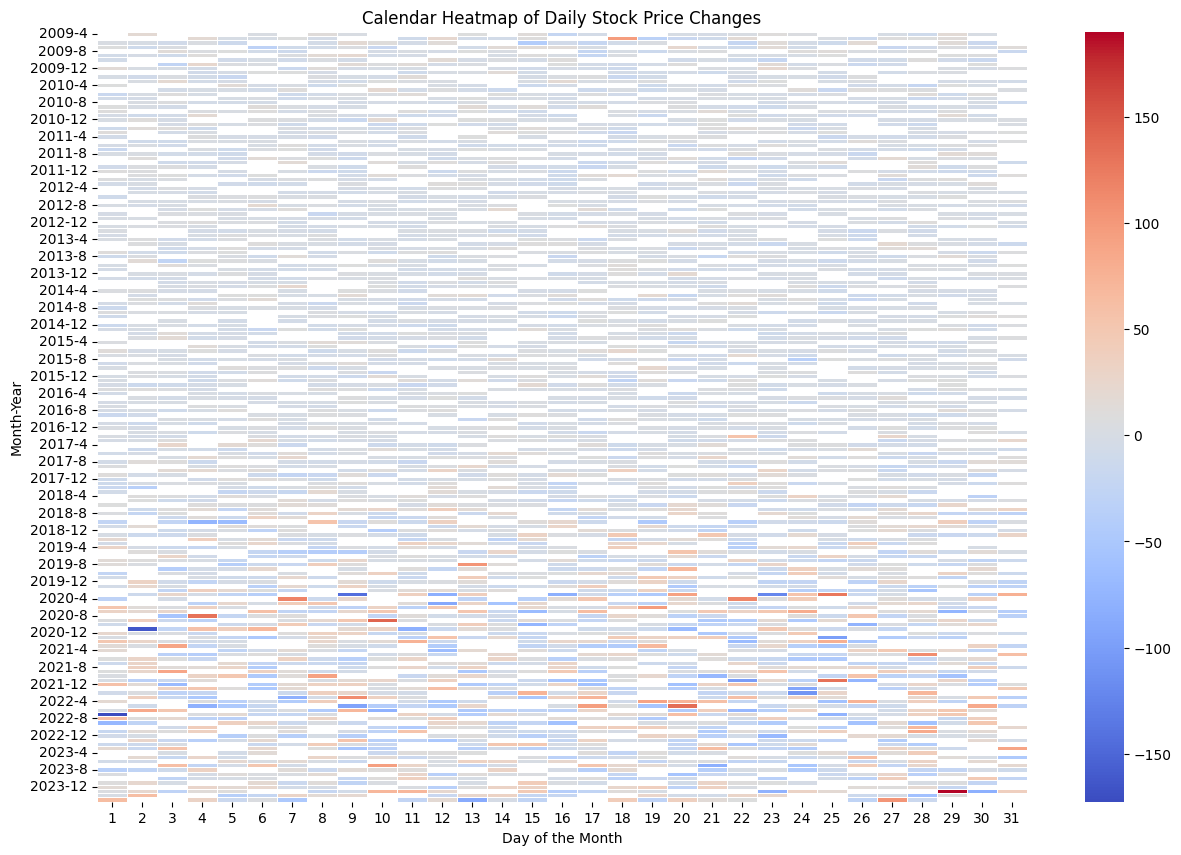

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Calendar Heatmap of Daily Stock Price Changes')
plt.xlabel('Day of the Month')
plt.ylabel('Month-Year')
plt.show()